In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/ibb_evcil_hayvan_türleri.csv", encoding='latin-1')
df.columns = df.columns.str.strip()  # Boşlukları sütun adlarından temizle

print(df)


              ilce  Kus  Kedi  Kopek  Balik  Diger
0           ADALAR   12    50     25      3      1
1       ARNAVUTKOY   40    29     18     13      6
2         ATASEHIR   70   145     54     17      1
3          AVCILAR   10    14      7      2      1
4         BAGCILAR    5     6      2      2      1
5     BAHCELIEVLER    9    30     12      2      1
6         BAKIRKOY    0     0      0      0      0
7       BASAKSEHIR   63    64     20      6      3
8       BAYRAMPAA    0     0      0      0      0
9         BESIKTAS    0     0      0      0      0
10          BEYKOZ   37    56     39      4      4
11      BEYLIKDUZU   22    56     41      9      2
12         BEYOGLU    0     0      0      0      0
13    BUYUKCEKMECE   17    45     23      9      3
14         CATALCA   15    18     20      1      0
15        CEKMEKOY   55    57     16     25      1
16         ESENLER    0     0      0      0      0
17        ESENYURT   76    70     20     10      3
18      EYUPSULTAN    0     0  

In [6]:
df.head()

,ilce,Kus,Kedi,Kopek,Balik,Diger
0,ADALAR,12,50,25,3,1
1,ARNAVUTKOY,40,29,18,13,6
2,ATASEHIR,70,145,54,17,1
3,AVCILAR,10,14,7,2,1
4,BAGCILAR,5,6,2,2,1


In [7]:
# to display stats about data
df.describe()

,Kus,Kedi,Kopek,Balik,Diger
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,36.615385,49.256410,18.564103,9.820513,1.948718
std,44.397496,62.085984,19.887572,12.885879,2.574661
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,30.000000,16.000000,4.000000,1.000000
75%,60.500000,66.000000,33.500000,14.000000,3.000000
max,162.000000,240.000000,65.000000,48.000000,9.000000


In [8]:
#to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ilce    39 non-null     object
 1   Kus     39 non-null     int64 
 2   Kedi    39 non-null     int64 
 3   Kopek   39 non-null     int64 
 4   Balik   39 non-null     int64 
 5   Diger   39 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


In [9]:
print(df.columns)


Index(['ilce', 'Kus', 'Kedi', 'Kopek', 'Balik', 'Diger'], dtype='object')


In [12]:
#This output is a Series showing the number of unique values ​​in the ' Balik' column and the number of times each value occurs.
df['Balik'].value_counts()

0     14
2      3
9      3
25     2
6      2
13     2
48     1
21     1
15     1
7      1
42     1
34     1
3      1
31     1
10     1
1      1
4      1
17     1
29     1
Name: Balik, dtype: int64

In [13]:
#check for null values
df.isnull().sum()

ilce     0
Kus      0
Kedi     0
Kopek    0
Balik    0
Diger    0
dtype: int64

<Axes: >

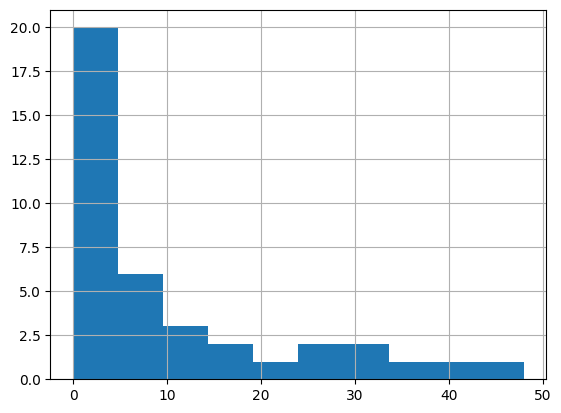

In [16]:
df['Balik'].hist()

<Axes: >

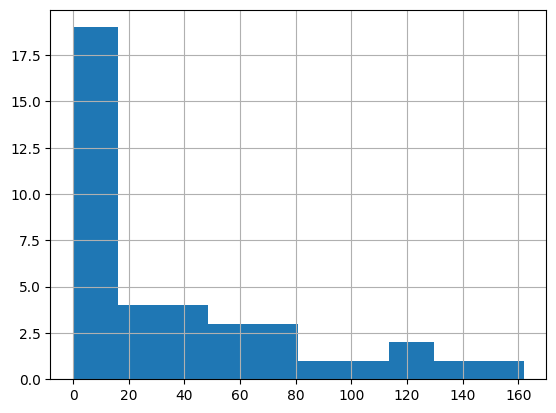

In [17]:
df['Kus'].hist()

<Axes: >

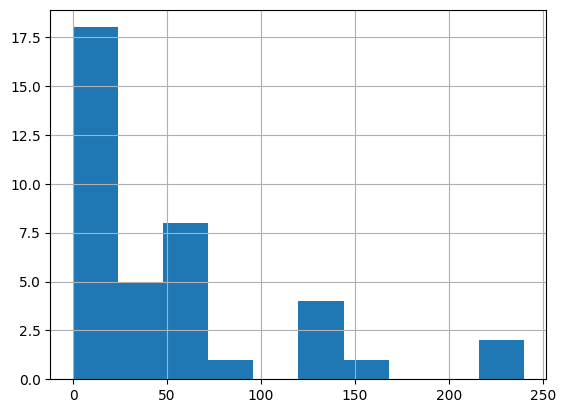

In [19]:
df['Kedi'].hist()

<Axes: >

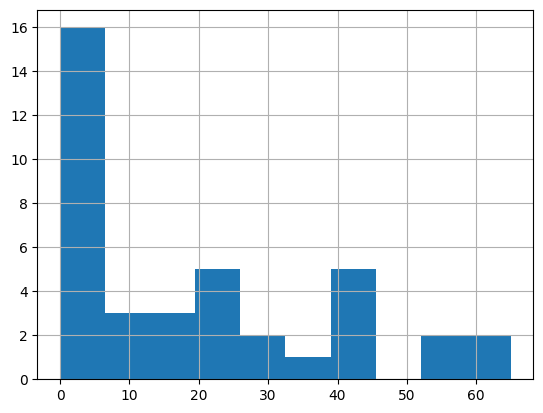

In [20]:
df['Kopek'].hist()

<Axes: >

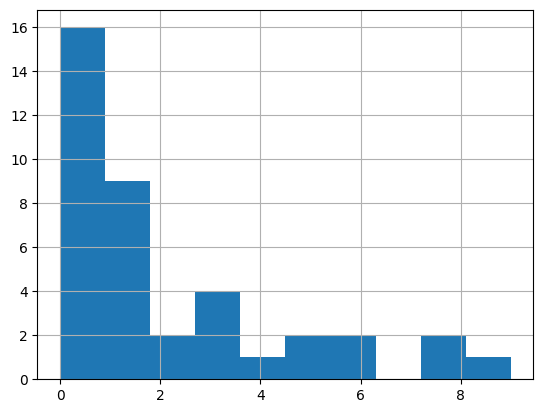

In [21]:
df['Diger'].hist()

In [22]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Kus,Kedi,Kopek,Balik,Diger
Kus,1.000000,0.850555,0.709977,0.918881,0.554416
Kedi,0.850555,1.000000,0.872938,0.834203,0.648059
Kopek,0.709977,0.872938,1.000000,0.714910,0.674872
Balik,0.918881,0.834203,0.714910,1.000000,0.536711
Diger,0.554416,0.648059,0.674872,0.536711,1.000000


<ipython-input-30-05e2be1fa528>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

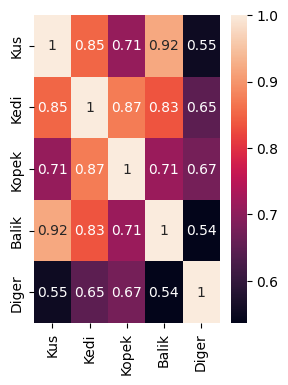

In [30]:

corr = df.corr()
fig, ax = plt.subplots(figsize=(3, 4))
sns.heatmap(corr, annot=True, ax=ax)



In [31]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df['ilce']=le.fit_transform(df['ilce'])
df.head()

,ilce,Kus,Kedi,Kopek,Balik,Diger
0,0,12,50,25,3,1
1,1,40,29,18,9,6
2,2,70,145,54,11,1
3,3,10,14,7,2,1
4,4,5,6,2,2,1


In [34]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['ilce'])
Y = df['ilce']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [35]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 'ilce' sütununu çıkartarak bağımsız değişkenleri (X) belirle
X = df.drop('ilce', axis=1)

# Bağımlı değişkeni (y) belirle
y = df['Balik']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression modelini oluştur
model = LogisticRegression()

# Modeli eğitim seti üzerinde eğit
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [43]:
# Modelin performansını test seti üzerinde değerlendir
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy: ", accuracy * 100)


Accuracy:  25.0


In [44]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
model.fit(X_train, y_train)


KNeighborsClassifier()

In [52]:
# print metric to get performance
print("Accuracy: ", model.score(X_test, y_test) * 100)


Accuracy:  25.0


In [55]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini oluştur
model = DecisionTreeClassifier()

# Modeli eğitim seti üzerinde eğit
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [57]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [59]:
# print metric to get performance
print("Accuracy: ", model.score(X_test, y_test) * 100)


Accuracy:  37.5


In [60]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [61]:
x_test.head()

,Kus,Kedi,Kopek,Balik,Diger
33,35,75,64,10,5
38,0,0,0,0,0
18,0,0,0,0,0
21,0,0,0,0,0
0,12,50,25,3,1


In [62]:
load_model = pickle.load(open(filename,'rb'))

In [68]:
load_model.predict([[35, 75, 25, 3,1]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])